# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup #as soup, I'll name this one myself in a way that makes my brain function, thank you
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [5]:
# Extract all rows of data
table = soup.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#soup.find_all('th')


In [7]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in table[1:]:
    row_scrape = row.find_all('td')
    row_data = [
        row_scrape[0].text.strip(),  # id, the identification number of a single transmission from the Curiosity rover
        row_scrape[1].text.strip(),  # terrestrial_date, the date on Earth
        row_scrape[2].text.strip(),  # sol, the number of elapsed sols (Martian days) since Curiosity landed on Mars
        row_scrape[3].text.strip(),  # ls, the solar longitude
        row_scrape[4].text.strip(),  # month, the Martian month
        row_scrape[5].text.strip(),  # min_temp, the minimum temperature, in Celsius, of a single Martian day (sol)
        row_scrape[6].text.strip()   # pressure, in Pascals, The atmospheric pressure at Curiosity's location (https://www-mars.lmd.jussieu.fr/paris2011/abstracts/gomez-elvira_paris2011.pdf)
    ]
    data.append(row_data)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data, columns=column_names)

In [9]:
# Confirm DataFrame was created successfully
df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
data_types = df.dtypes
data_types

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
# id already object type
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int')
df['ls'] = df['ls'].astype('int')
df['month'] = df['month'].astype('int')
df['min_temp'] = df['min_temp'].astype('float')
df['pressure'] = df['pressure'].astype('float')

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_months_on_mars = df['month'].nunique()
month_counts = df['month'].value_counts().sort_index()
print("The question is entirely arbitrary as the unit of measurement of a 'month' is based on a human-led effort to discretize the time traveled around the sun.  The only real points of reference would be the aphelion and parahelion of Mars relative to the sun and the halfway points between those, which might be described as seasons or long earth-months.  Realistically, there is no human life on Mars, further subdivision is likely largely immaterial, thus the best approximation would be 4 months in accordance with astrophysics.  Perhaps there is more to the question of a month and its purpose as humanity largely uses the Gregorian system, another arbitrary contrivance.  Other systems exist in the form of the Julian calendar, the Islamic or Hebrew calendars, Chinese... All very human centric and entirely devoid of connection to the Martian landscape.  \nBut I digress, the dataset shows that the count of months on mars is: ", num_months_on_mars)
print("Unfortunately the phrasing of the question does not align with the target values, which instead present as follows, which is the count of the instances of each month in the dataset:")
month_counts

The question is entirely arbitrary as the unit of measurement of a 'month' is based on a human-led effort to discretize the time traveled around the sun.  The only real points of reference would be the aphelion and parahelion of Mars relative to the sun and the halfway points between those, which might be described as seasons or long earth-months.  Realistically, there is no human life on Mars, further subdivision is likely largely immaterial, thus the best approximation would be 4 months in accordance with astrophysics.  Perhaps there is more to the question of a month and its purpose as humanity largely uses the Gregorian system, another arbitrary contrivance.  Other systems exist in the form of the Julian calendar, the Islamic or Hebrew calendars, Chinese... All very human centric and entirely devoid of connection to the Martian landscape.  
But I digress, the dataset shows that the count of months on mars is:  12
Unfortunately the phrasing of the question does not align with the ta

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

The question is entirely arbitrary as the unit of measurement of a 'month' is based on a human-led effort to discretize the time traveled around the sun.  The only real points of reference would be the aphelion and parahelion of Mars relative to the sun and the halfway points between those, which might be described as seasons or long earth-months.  Realistically, there is no human life on Mars, further subdivision is likely largely immaterial, thus the best approximation would be 4 months in accordance with astrophysics.  Perhaps there is more to the question of a month and its purpose as humanity largely uses the Gregorian system, another arbitrary contrivance.  Other systems exist in the form of the Julian calendar, the Islamic or Hebrew calendars, Chinese... All very human centric and entirely devoid of connection to the Martian landscape.  

But I digress, the dataset shows that the count of months on mars is:  12

Unfortunately the phrasing of the question does not align with the target values, which instead present as the table above, which is the count of the instances of each month in the dataset.

In [14]:
# 2. How many Martian days' worth of data are there?
mars_days = df['sol'].nunique()
print("Linguistically there are 365.25 Martian days as a 'day' is an Earth-specific measurement or perhaps the number would be 0 in that context.  It feels a lot like calling the Earth's moon 'the moon' when we know that locally orbitting satellites of sufficient size around planets exist all over the place, Jupiter having between 80 and 95 according to NASA.  Moreover we have a perfectly good name of Earth's moon as Luna, or Selene given the Greco-Roman influence on naming other celestial bodies.  \nI digress, if we're looking at the number of sols in a martian year, or 'Martian Days' if we must:", mars_days)

Linguistically there are 365.25 Martian days as a 'day' is an Earth-specific measurement or perhaps the number would be 0 in that context.  It feels a lot like calling the Earth's moon 'the moon' when we know that locally orbitting satellites of sufficient size around planets exist all over the place, Jupiter having between 80 and 95 according to NASA.  Moreover we have a perfectly good name of Earth's moon as Luna, or Selene given the Greco-Roman influence on naming other celestial bodies.  
I digress, if we're looking at the number of sols in a martian year, or 'Martian Days' if we must: 1867


Linguistically there are 365.25 Martian days as a 'day' is an Earth-specific measurement or perhaps the number would be 0 in that context.  It feels a lot like calling the Earth's moon 'the moon' when we know that locally orbitting satellites of sufficient size around planets exist all over the place, Jupiter having between 80 and 95 according to NASA.  Moreover we have a perfectly good name of Earth's moon as Luna, or Selene given the Greco-Roman influence on naming other celestial bodies.  

I digress, if we're looking at the number of sols in a martian year ('Martian Days' if we must): 1867

In [15]:
# 3. What is the average low temperature by month?
# Broken out here while I'm here since it's going to be referenced later
grouped_by_month = df.groupby('month')
average_min_temp = grouped_by_month['min_temp'].mean()
average_pressure = grouped_by_month['pressure'].mean()

average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

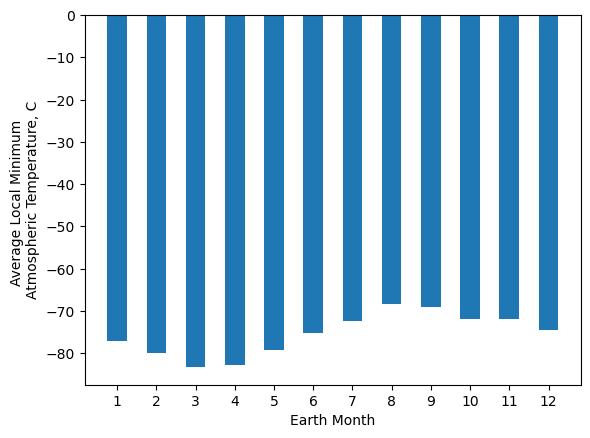

In [16]:
# Plot the average temperature by month
plt.bar(average_min_temp.index, average_min_temp, width=0.5)
plt.xlabel('Earth Month')
plt.ylabel('Average Local Minimum \nAtmospheric Temperature, C')
plt.xticks(range(1, 13), range(1, 13))
plt.show()


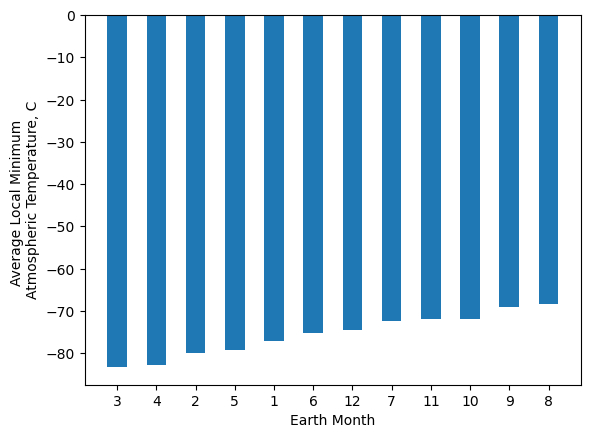

Coldest Earth-Month: 3
Warmest Earth-Month: 8


In [17]:
# Identify the coldest and hottest months in Curiosity's location

sorted_avg_min_temp = average_min_temp.sort_values(ascending=True)
plt.bar(sorted_avg_min_temp.index.astype(str), sorted_avg_min_temp, width=0.5)
plt.xlabel('Earth Month')
plt.ylabel('Average Local Minimum \nAtmospheric Temperature, C')
plt.xticks(range(0, 12))
plt.show()

coldest_month = average_min_temp.idxmin()
warmest_month = average_min_temp.idxmax()
print("Coldest Earth-Month:", coldest_month)
print("Warmest Earth-Month:", warmest_month)


The third month of the dataset routinely was coldest and 8th month was the hottest.

In [18]:
# 4. Average pressure by Martian month
average_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

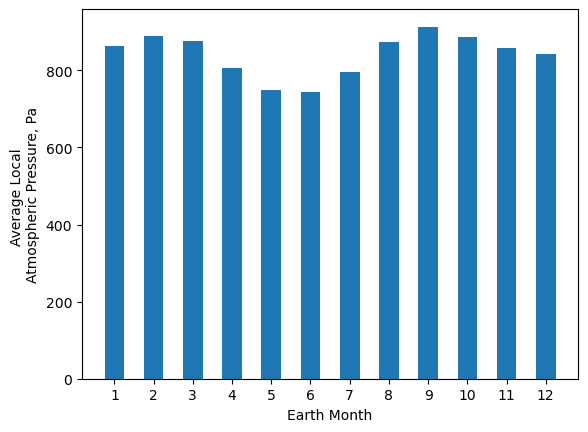

In [19]:
# Plot the average pressure by month

# Unsorted...
plt.bar(average_pressure.index.astype(str), average_pressure, width=0.5)
plt.xlabel('Earth Month')
plt.ylabel('Average Local \nAtmospheric Pressure, Pa')
plt.xticks(range(0, 12))
plt.show()

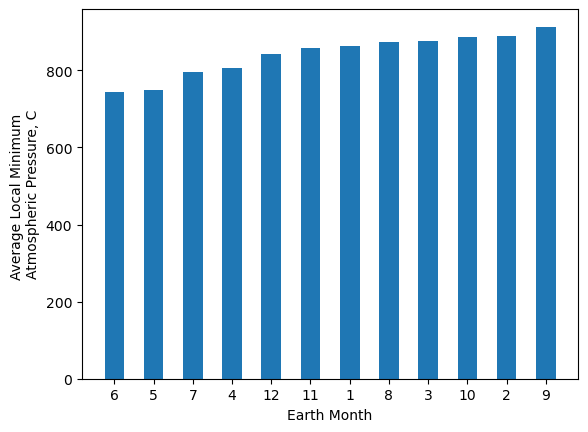

Lowest atmospheric pressure month: 6
Highest atmospheric pressure month: 9


In [20]:
# Plot the average pressure by month

# Sorted...
sorted_average_pressure = average_pressure.sort_values(ascending=True)

plt.bar(sorted_average_pressure.index.astype(str), sorted_average_pressure, width=0.5)
plt.xlabel('Earth Month')
plt.ylabel('Average Local Minimum \nAtmospheric Pressure, Pa')
plt.xticks(range(0, 12))
plt.show()

sorted_average_pressure
lowest_pressure = average_pressure.idxmin()
highest_pressure= average_pressure.idxmax()

print("Lowest atmospheric pressure month:", lowest_pressure)
print("Highest atmospheric pressure month:", highest_pressure)

The sixth month of the dataset routinely had the lowest atmospheric pressure while the ninth month had the highest.

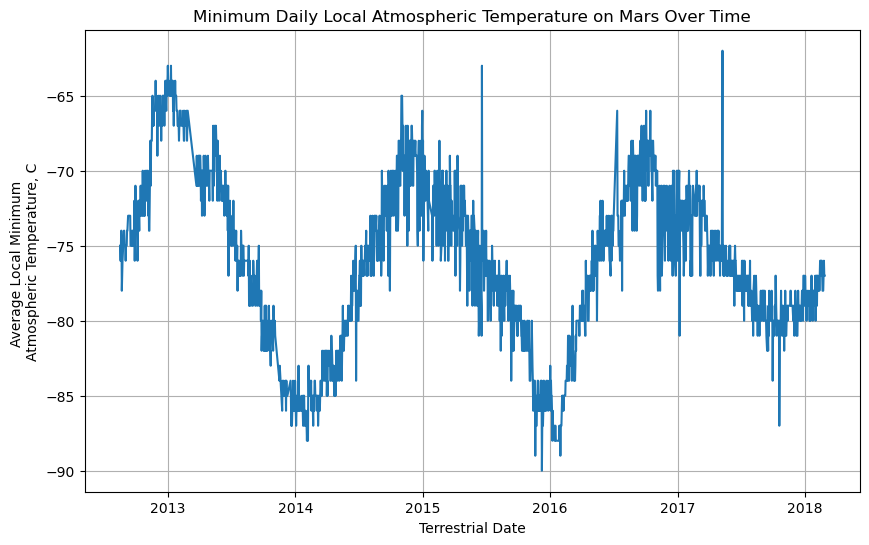

In [34]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.xlabel('Terrestrial Date')
plt.ylabel('Average Local Minimum \nAtmospheric Temperature, C')
plt.title('Minimum Daily Local Atmospheric Temperature on Mars Over Time')
plt.grid(True)
plt.show()

A Martian year is the amount of time it takes for Mars to orbit the sun, of course, and the number of sols in a Martian year are going to differ from an Earth day.  The cyclical nature of this orbit will show up in the data if temperature is plotted against a continuous timeline.  The same trend occurs with Earth and behaves in the form of regional seasons - cold winters, warm summers, etc.  

Terrestrial days are provided by the dataset as well as the local temperature recorded by Curiosity.  Seasonality can indeed be observed in the data.  Conveniently it appears that the start of a Martian year coincided with the Earth year 2013, the next temperature peak can be observed approximately 80% of the way into the year 2014.
Earth years are 365 days, thus an elapsed time of 365 + 0.8*365 yields an estimated 657 sols per Martian year.  

The generous Nasa Aerospace engineer Thomas Gangale corroborates this finding in detail, showing a more accurate count at 668.5921 sols.  Pretty close.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
csv_file_path = 'mars_data.csv'  
df.to_csv(csv_file_path, index=False)


In [23]:
browser.quit()

# For fun, I decided to add in the Martian Darian calendar for analysis for its Mars-centric nature

In [24]:
# The Darian calendar (Martian calendar proposed by Nasa Aerospace engineer Thomas Gangale) starts at 11-MAR-1609 https://ops-alaska.com/time/gangale_mst/darian.htm#:~:text=Since%20the%20Darian%20calendar%20year,Earth%20or%20Mars)%3F%22)

darian_reference = pd.Timestamp('1677-09-22')
# However darian_reference = pd.Timestamp('1609-03-11') yields an out of bounds error since Pandas minimum timestamp is Timestamp('1677-09-22 00:12:43.145225'), from https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a
# Thus a correcting factor for integer days between Pandas epoch and Darian epoch is included...
days_correcting_factor = 25303 
darian_month_names = {
    1: 'Sagittarius',
    2: 'Dhanus',
    3: 'Capricornus',
    4: 'Makara',
    5: 'Aquarius',
    6: 'Kumbha',
    7: 'Pisces',
    8: 'Meena',
    9: 'Aries',
    10: 'Mesha',
    11: 'Taurus',
    12: 'Rishabha',
    13: 'Gemini',
    14: 'Mithuna',
    15: 'Cancer',
    16: 'Karka',
    17: 'Leo',
    18: 'Simha',
    19: 'Virgo',
    20: 'Kanya',
    21: 'Libra',
    22: 'Tula',
    23: 'Scorpio',
    24: 'Vrishika'
}

def terrestrial_to_darian(terrestrial_date):
    # Calculate the difference in days between the terrestrial date and the Darian Epoch...
    terrestrial_date = terrestrial_date.to_pydatetime() # The error message told me to do this
    days_difference = (terrestrial_date - darian_reference).days - days_correcting_factor
    # 668.5921 is the conversion factor provided by the site for the number of sols per Martian year, lol
    darian_month = int((days_difference % 668.5921) / 28 + 1)
    
    return darian_month

darian_months = []

for index, row in df.iterrows():
    terrestrial_date = pd.to_datetime(row['terrestrial_date'])
    darian_month = terrestrial_to_darian(terrestrial_date)
    
    darian_months.append(darian_month)

df['darian_month'] = darian_months
df['darian_month_name'] = [darian_month_names.get(month_num, 'Unknown') for month_num in df['darian_month']]

# This joke was more complicated than anticipated but I was committed.

In [25]:
# 1. How many months are there on Mars?

darian_month_counts = df['darian_month'].value_counts().sort_index()
darian_month_counts_df = pd.DataFrame({
    'Darian Month Number': darian_month_counts.index,
    'Count': darian_month_counts.values
})

darian_month_counts_df['Darian Month Name'] = [darian_month_names.get(darian_month_num, 'Unknown') for darian_month_num in darian_month_counts_df['Darian Month Number']]
darian_month_counts_df = darian_month_counts_df[['Darian Month Number', 'Darian Month Name', 'Count']]

print(darian_month_counts_df)

print("There are 24 months on Mars, imposed with much thought and scrutiny detailed on Thomas Gangale's website.")

    Darian Month Number Darian Month Name  Count
0                     1       Sagittarius     82
1                     2            Dhanus     81
2                     3       Capricornus     92
3                     4            Makara     82
4                     5          Aquarius     81
5                     6            Kumbha     75
6                     7            Pisces     81
7                     8             Meena     81
8                     9             Aries     81
9                    10             Mesha     65
10                   11            Taurus     65
11                   12          Rishabha     75
12                   13            Gemini     79
13                   14           Mithuna     78
14                   15            Cancer     80
15                   16             Karka     72
16                   17               Leo     80
17                   18             Simha     84
18                   19             Virgo     67
19                  

In [26]:
# 2. How many Martian days' worth of data are there?

print("No change here, sols:")
print(mars_days)

No change here, sols:
1867


In [27]:
# 3. What is the average low temperature by month?

grouped_by_month_dar = df.groupby('darian_month')
average_min_temp_dar = grouped_by_month_dar['min_temp'].mean()
average_pressure_dar = grouped_by_month_dar['pressure'].mean()

average_min_temp_dar


darian_month
1    -82.012195
2    -80.308642
3    -77.804348
4    -75.573171
5    -74.185185
6    -72.266667
7    -69.950617
8    -68.160494
9    -68.160494
10   -69.953846
11   -72.046154
12   -71.893333
13   -72.025316
14   -72.628205
15   -74.500000
16   -75.986111
17   -76.750000
18   -78.595238
19   -78.805970
20   -80.521739
21   -82.345679
22   -83.833333
23   -83.617284
24   -83.450704
Name: min_temp, dtype: float64

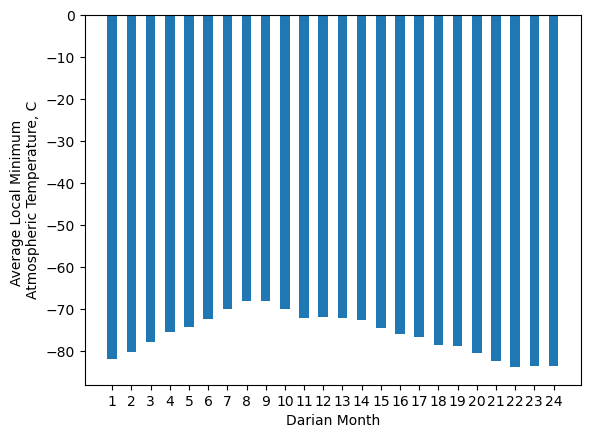

In [28]:
# Darian month plotted now
plt.bar(average_min_temp_dar.index, average_min_temp_dar, width=0.5)
plt.xlabel('Darian Month')
plt.ylabel('Average Local Minimum \nAtmospheric Temperature, C')
plt.xticks(range(1, 25), range(1, 25))
plt.show()


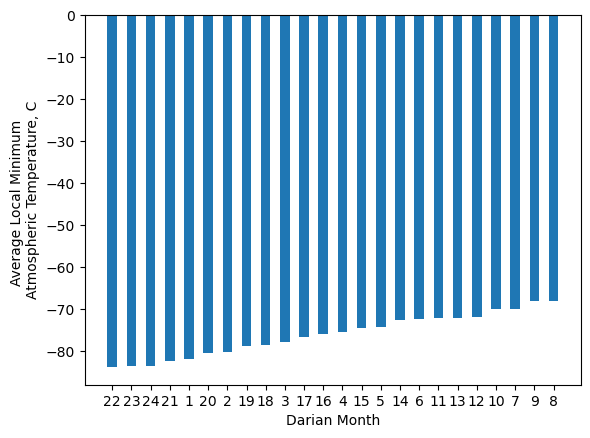

Coldest month (Darian): 22
Warmest month (Darian): 8


In [29]:
sorted_avg_min_temp_dar = average_min_temp_dar.sort_values(ascending=True)
plt.bar(sorted_avg_min_temp_dar.index.astype(str), sorted_avg_min_temp_dar, width=0.5)
plt.xlabel('Darian Month')
plt.ylabel('Average Local Minimum \nAtmospheric Temperature, C')
plt.xticks(range(0, 24))
plt.show()

coldest_month_dar = average_min_temp_dar.idxmin()
warmest_month_dar= average_min_temp_dar.idxmax()

print("Coldest month (Darian):", coldest_month_dar)
print("Warmest month (Darian):", warmest_month_dar)

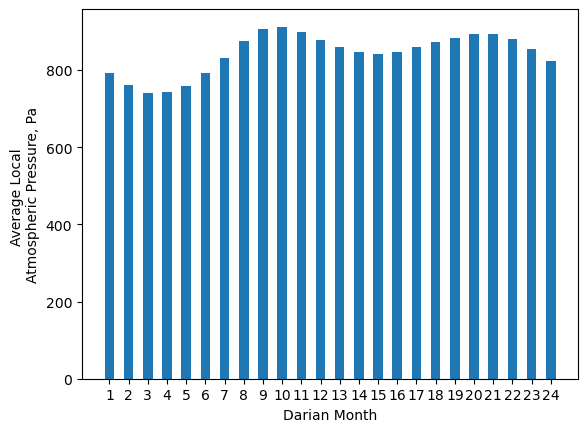

darian_month
1     791.317073
2     762.098765
3     740.739130
4     741.804878
5     758.123457
6     791.146667
7     831.172840
8     876.185185
9     906.395062
10    911.984615
11    897.092308
12    878.786667
13    859.797468
14    847.294872
15    841.587500
16    845.652778
17    858.900000
18    873.071429
19    881.925373
20    892.608696
21    893.580247
22    879.571429
23    853.296296
24    822.295775
Name: pressure, dtype: float64

In [30]:
# 4. Average pressure by Martian month using the Darian scale

# Unsorted...
plt.bar(average_pressure_dar.index, average_pressure_dar, width=0.5)
plt.xlabel('Darian Month')
plt.ylabel('Average Local \nAtmospheric Pressure, Pa')
plt.xticks(range(1, 25), range(1, 25))
plt.show()

average_pressure_dar


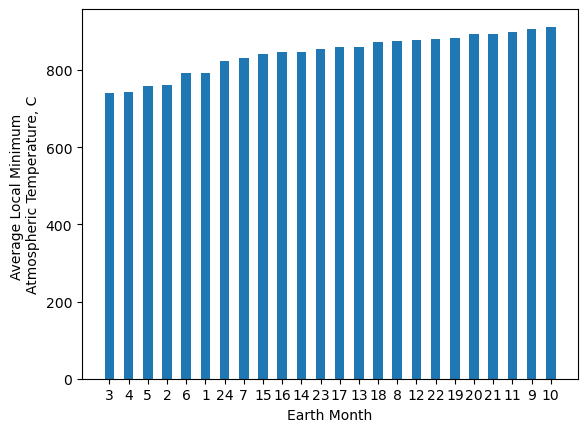

Lowest atmospheric pressure month (Darian): 3
Highest atmospheric pressure month (Darian): 10


In [31]:
# 4. Average pressure by Martian month using the Darian scale

# Sorted...
sorted_average_pressure_dar = average_pressure_dar.sort_values(ascending=True)

plt.bar(sorted_average_pressure_dar.index.astype(str), sorted_average_pressure_dar, width=0.5)
plt.xlabel('Earth Month')
plt.ylabel('Average Local Minimum \nAtmospheric Temperature, C')
plt.xticks(range(0, 24))
plt.show()

lowest_pressure_dar = average_pressure_dar.idxmin()
highest_pressure_dar= average_pressure_dar.idxmax()

print("Lowest atmospheric pressure month (Darian):", lowest_pressure_dar)
print("Highest atmospheric pressure month (Darian):", highest_pressure_dar)

Lowest pressure month (Darian): 3

Highest pressure month (Darian): 10